<a href="https://colab.research.google.com/github/matte0-0/DCS-210/blob/main/proj1_The_Bechdel_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: The Bechdel Test

by Matteo Pagano

for DCS 210: Programming for Data Analysis and Visualization

In [1]:
install.packages("tidyverse")
install.packages("fivethirtyeight")

library(tidyverse)
library(fivethirtyeight)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Some larger datasets need to be installed separately, like senators and
house_district_forecast. To install these, we recommend you install the
fivethirtyeightdata package by running:
install.packages('fivethirtyeightdata', repos =
'https://fivethirtyeightdata.github.io/drat/', type = 'source')



## Question 1

Q. What information does this dataset contain? What commands did you use to see this?

A. The `fivethirtyeight` package contains many datasets used in reporting from the news website FiveThirtyEight. To see all of the datasets contained in the package I used the command `data(package = "fivethirtyeight")`. More specifically, the `bechdel` dataset contains 1,794 rows/observations representing individual movies and 15 columns/variables containing a variety of information about each movie. Alongside basic info like each movie's title, year, budget, and box office gross, there are multiple variables with details about whether (and how well) each movie passes the Bechdel test. To see this, I used the command `glimpse(bechdel)`.

In [7]:
data(package = "fivethirtyeight")

In [9]:
glimpse(bechdel)

Rows: 1,794
Columns: 15
$ year          <int> 2013, 2012, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 20…
$ imdb          <chr> "tt1711425", "tt1343727", "tt2024544", "tt1272878", "tt0…
$ title         <chr> "21 & Over", "Dredd 3D", "12 Years a Slave", "2 Guns", "…
$ test          <chr> "notalk", "ok-disagree", "notalk-disagree", "notalk", "m…
$ clean_test    <ord> notalk, ok, notalk, notalk, men, men, notalk, ok, ok, no…
$ binary        <chr> "FAIL", "PASS", "FAIL", "FAIL", "FAIL", "FAIL", "FAIL", …
$ budget        <int> 13000000, 45000000, 20000000, 61000000, 40000000, 225000…
$ domgross      <dbl> 25682380, 13414714, 53107035, 75612460, 95020213, 383624…
$ intgross      <dbl> 42195766, 40868994, 158607035, 132493015, 95020213, 1458…
$ code          <chr> "2013FAIL", "2012PASS", "2013FAIL", "2013FAIL", "2013FAI…
$ budget_2013   <int> 13000000, 45658735, 20000000, 61000000, 40000000, 225000…
$ domgross_2013 <dbl> 25682380, 13611086, 53107035, 75612460, 95020213, 383624…
$ intgross_2013 

## Question 2

Q. How many movies are in our filtered data set?

A. Once the dataset has been filtered to focus only on movies released between 1990 and 2013 (the most recent year in the set), the total number of movies has decreased to 1,615.

In [10]:
bechdel90_13 <- bechdel %>%
  filter(between(year, 1990, 2013))

In [12]:
glimpse(bechdel90_13)

Rows: 1,615
Columns: 15
$ year          <int> 2013, 2012, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 20…
$ imdb          <chr> "tt1711425", "tt1343727", "tt2024544", "tt1272878", "tt0…
$ title         <chr> "21 & Over", "Dredd 3D", "12 Years a Slave", "2 Guns", "…
$ test          <chr> "notalk", "ok-disagree", "notalk-disagree", "notalk", "m…
$ clean_test    <ord> notalk, ok, notalk, notalk, men, men, notalk, ok, ok, no…
$ binary        <chr> "FAIL", "PASS", "FAIL", "FAIL", "FAIL", "FAIL", "FAIL", …
$ budget        <int> 13000000, 45000000, 20000000, 61000000, 40000000, 225000…
$ domgross      <dbl> 25682380, 13414714, 53107035, 75612460, 95020213, 383624…
$ intgross      <dbl> 42195766, 40868994, 158607035, 132493015, 95020213, 1458…
$ code          <chr> "2013FAIL", "2012PASS", "2013FAIL", "2013FAIL", "2013FAI…
$ budget_2013   <int> 13000000, 45658735, 20000000, 61000000, 40000000, 225000…
$ domgross_2013 <dbl> 25682380, 13611086, 53107035, 75612460, 95020213, 383624…
$ intgross_2013 

## Question 3

Q. What are those movies with *very* high returns on investment?

A. Those three movies with extremely high returns on investment which make it difficult to see the distributions clearly are Paranormal Activity (2007), The Blair Witch Project (1999), and El Mariachi (1992).

In [13]:
# Group filtered dataset by a binary check of the Bechdel test: PASS or FAIL.
#     Summarise grouped dataset into median budget, median domestic gross, and  
#     median international gross (removing any NA data first), all adjusted for 
#     inflation to the value of USD in 2013.

bechdel90_13 %>%
  group_by(binary) %>%
  summarise(med_budget = median(budget_2013),
    med_domgross = median(domgross_2013, na.rm = TRUE),
    med_intgross = median(intgross_2013, na.rm = TRUE))

binary,med_budget,med_domgross,med_intgross
<chr>,<dbl>,<dbl>,<dbl>
FAIL,48385984,57318606,104475669
PASS,31070724,45330446,80124349


In [14]:
# Group filtered dataset by a more detailed description of each movie's Bechdel
# test results: 'ok', 'dubious', 'men', 'notalk', or 'nowomen'.
#   'ok'      = passes test
#   'dubious' = ...dubious
#   'men'     = women only talk about men
#   'notalk'  = women don't talk to each other
#   'nowomen' = fewer than two women
#     Summarise grouped dataset into median budget, median domestic gross, and  
#     median international gross (removing any NA data first), all adjusted for
#     inflation to the value of USD in 2013.

bechdel90_13 %>%
  group_by(clean_test) %>%
  summarise(med_budget = median(budget_2013),
    med_domgross = median(domgross_2013, na.rm = TRUE),
    med_intgross = median(intgross_2013, na.rm = TRUE))

clean_test,med_budget,med_domgross,med_intgross
<ord>,<dbl>,<dbl>,<dbl>
nowomen,43373066,44891296,89509349
notalk,56570084,63890455,123102194
men,39737690,56392786,99578022
dubious,35790994,49173429,89883201
ok,31070724,45330446,80124349


In [16]:
# Creating a new variable 'roi' to evaluate the return on investment for each 
# movie as a ratio of the gross to budget.

bechdel90_13 <- bechdel90_13 %>%
  mutate(roi = (intgross_2013 + domgross_2013) / budget_2013)

In [17]:
# Arrange dataset in order of new 'roi' variable to see which movies have the 
# highest return on investment.

bechdel90_13 %>%
  arrange(desc(roi)) %>%
  select(title, roi, year)

title,roi,year
<chr>,<dbl>,<int>
Paranormal Activity,671.33686,2007
The Blair Witch Project,648.06533,1999
El Mariachi,583.28567,1992
Clerks.,258.06146,1994
In the Company of Men,230.69259,1997
Napoleon Dynamite,226.65924,2004
Once,189.62070,2006
The Devil Inside,155.02037,2012
Primer,141.52085,2004


Warning message:
“Removed 15 rows containing non-finite values (stat_boxplot).”


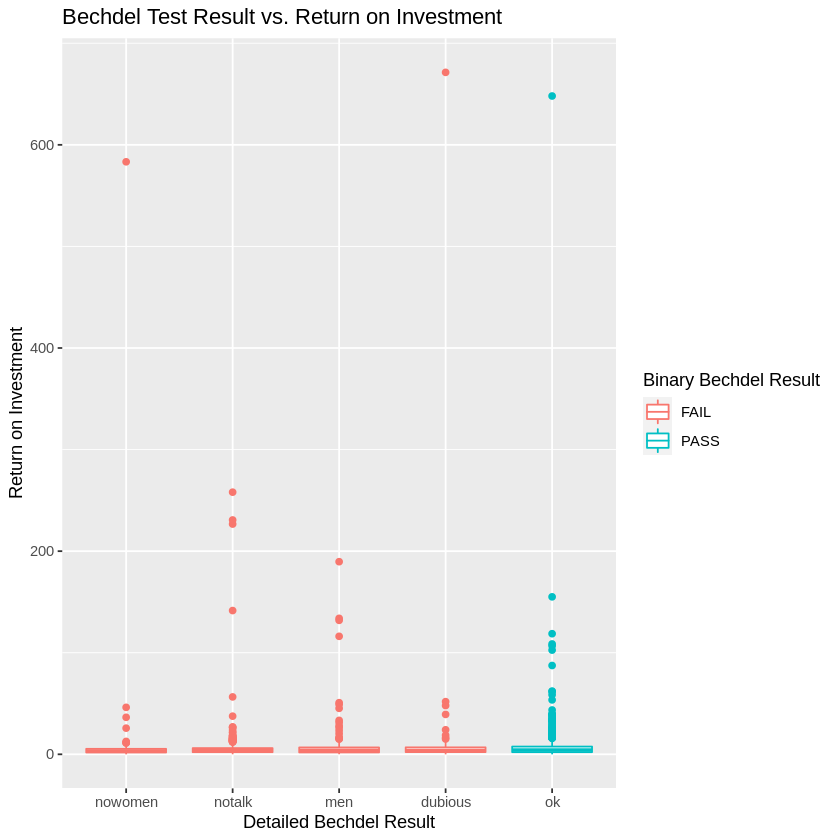

In [18]:
# Visualize return on investment by test result.

ggplot(data = bechdel90_13,
  mapping = aes(x = clean_test, y = roi, color = binary)) +
  geom_boxplot() + 
  labs(title = "Bechdel Test Result vs. Return on Investment",
       x = "Detailed Bechdel Result",
       y = "Return on Investment",
       color = "Binary Bechdel Result")

In [20]:
bechdel90_13 %>%
  filter(roi > 400) %>%
  select(title, budget_2013, domgross_2013, year)

title,budget_2013,domgross_2013,year
<chr>,<int>,<dbl>,<int>
Paranormal Activity,505595,121251476,2007
The Blair Witch Project,839077,196538593,1999
El Mariachi,11622,3388636,1992


Warning message:
“Removed 15 rows containing non-finite values (stat_boxplot).”


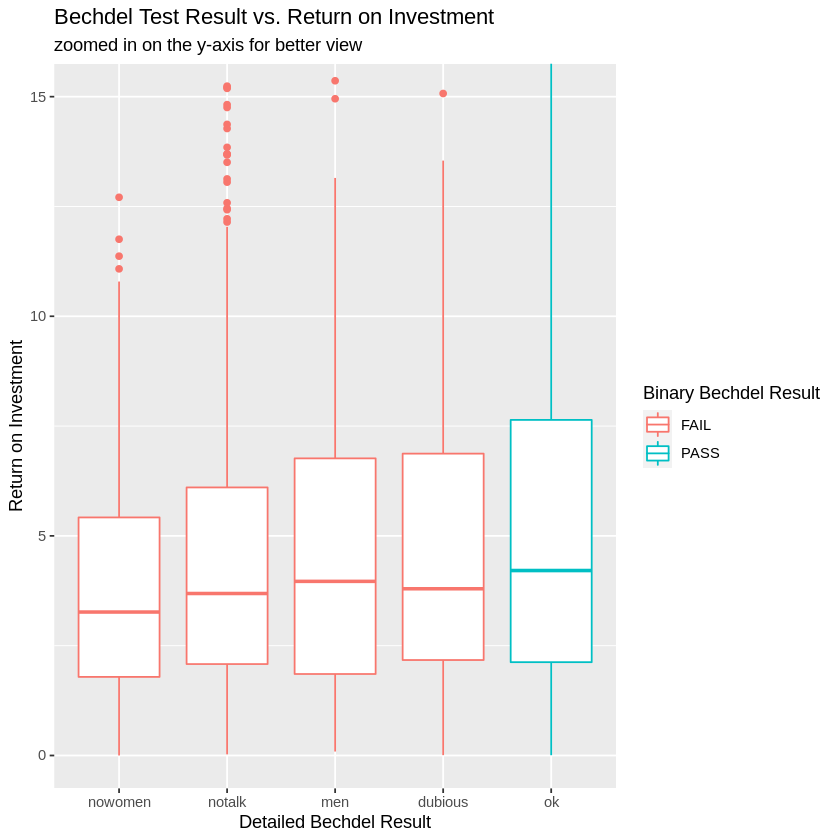

In [23]:
# Visualize return on investment by test result, zoomed in to get a better view
# of the 'roi' distributions (omitting Paranormal Activity, The Blair Witch 
# Project, and El Mariachi).

ggplot(data = bechdel90_13, 
  mapping = aes(x = clean_test, y = roi, color = binary)) +
  geom_boxplot() + 
  labs(title = "Bechdel Test Result vs. Return on Investment",
       subtitle = "zoomed in on the y-axis for better view",
       x = "Detailed Bechdel Result",
       y = "Return on Investment",
       color = "Binary Bechdel Result") + 
  coord_cartesian(ylim = c(0, 15))